In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


In [11]:
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [12]:
inputs=digits.data
target=digits.target
images=digits.images  

In [13]:
inputs.shape

(1797, 64)

In [14]:
target

array([0, 1, 2, ..., 8, 9, 8])

In [15]:
images.shape

(1797, 8, 8)

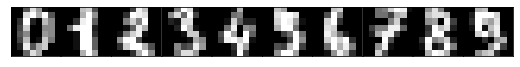

In [16]:

fig, axes = plt.subplots(1,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i],cmap="gray")

In [17]:
from sklearn.decomposition import PCA
#n_components=0.80 means it will return the Eigenvectors that have the 80% of the variation in the dataset
faces_pca = PCA(n_components=0.8)
faces_pca.fit(inputs)

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

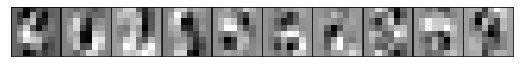

In [20]:
fig, axes = plt.subplots(1,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
 ax.imshow(faces_pca.components_[i].reshape(8,8),cmap="gray")

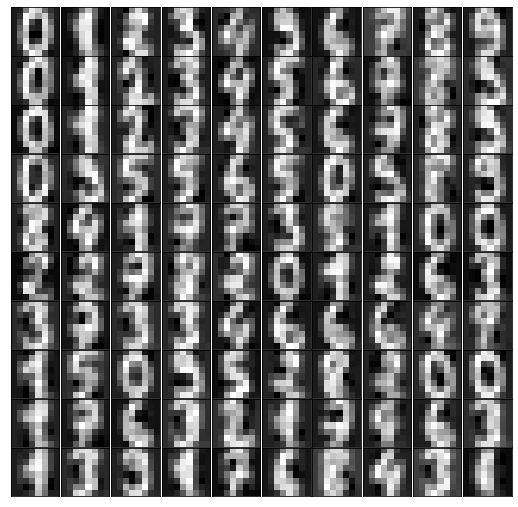

In [22]:
components = faces_pca.transform(inputs)
projected = faces_pca.inverse_transform(components)

fig, axes = plt.subplots(10,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(8,8),cmap="gray")

TSNE

In [24]:
def Implement_TSNE(n, df,target):
  from sklearn.manifold import TSNE
  model = TSNE(n_components = n, random_state = 42,verbose=0, perplexity=40, n_iter=400)
  tsne_data = model.fit_transform(df)
  print(tsne_data.shape)
  tsne_data = np.vstack((tsne_data.T, target)).T 
  return tsne_data

In [25]:
tsne_data = Implement_TSNE(2, inputs, target)
tsne_Idf = pd.DataFrame(tsne_data)
tsne_Idf

(1797, 2)


,0,1,2
0,32.836502,-1.908551,0.0
1,-11.251637,-4.373931,1.0
2,-10.841381,13.386648,2.0
3,9.554954,22.047928,3.0
4,-11.103338,-25.988131,4.0
...,...,...,...
1792,16.321720,12.923214,9.0
1793,28.209911,-6.365882,0.0
1794,-3.209712,8.489774,8.0
1795,14.178910,10.932550,9.0


In [35]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(
        x = tsne_Idf.iloc[:,0],
        y = tsne_Idf.iloc[:,1],
        mode='markers',
        hovertext= tsne_Idf.iloc[:,2],
        #showlegend=True,
        marker=dict(
            size=10,
            color=tsne_Idf.iloc[:,2], #set color equal to a variable
            colorscale = 'Viridis', # one of plotly colorscales
            
            showscale=True,
            opacity=1,
            line_width=1
        )
    ))
  # figure layout
fig.update_layout(margin=dict(l=50,r=50,b=50,t=50),width=1000,height=500)
fig.layout.template = 'plotly_dark' 
    
fig.show()

SVD

In [27]:
uI, sI, vI = np.linalg.svd(inputs, full_matrices=True)

In [28]:
print(uI.shape)
print(sI.shape)
print(vI.shape)


(1797, 1797)
(64,)
(64, 64)


In [29]:
variance_Iexplained = np.round(sI**2/np.sum(sI**2), decimals=3)
variance_Iexplained

array([0.696, 0.047, 0.043, 0.037, 0.026, 0.018, 0.015, 0.013, 0.011,
       0.01 , 0.008, 0.007, 0.006, 0.006, 0.005, 0.004, 0.004, 0.004,
       0.003, 0.003, 0.003, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   ])

In [31]:
col_labels= ['SV'+str(i) for i in range(1,4)]
svd_Idf = pd.DataFrame(uI[:,0:3], index=target.tolist(), columns=col_labels)
svd_Idf

,SV1,SV2,SV3
0,0.020911,-0.002103,0.038930
1,0.025320,0.013866,-0.037799
2,0.025456,0.012195,-0.017827
3,0.020581,-0.028023,0.006159
4,0.018577,0.041213,0.007244
...,...,...,...
9,0.026195,-0.025809,0.025086
0,0.029065,0.011308,0.038734
8,0.029878,0.018799,-0.011613
9,0.026723,-0.008662,0.023474


In [32]:
svd_Idf=svd_Idf.reset_index()
svd_Idf.rename(columns={'index':'Label'}, inplace=True)
svd_Idf.head

<bound method NDFrame.head of       Label       SV1       SV2       SV3
0         0  0.020911 -0.002103  0.038930
1         1  0.025320  0.013866 -0.037799
2         2  0.025456  0.012195 -0.017827
3         3  0.020581 -0.028023  0.006159
4         4  0.018577  0.041213  0.007244
...     ...       ...       ...       ...
1792      9  0.026195 -0.025809  0.025086
1793      0  0.029065  0.011308  0.038734
1794      8  0.029878  0.018799 -0.011613
1795      9  0.026723 -0.008662  0.023474
1796      8  0.029387 -0.000803  0.012992

[1797 rows x 4 columns]>

In [34]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(
        x = svd_Idf.iloc[:,1],
        y = svd_Idf.iloc[:,2],
        mode='markers',
        hovertext= svd_Idf.iloc[:,0],
        marker=dict(
            size=8,
            color=svd_Idf.iloc[:,0], #set color equal to a variable
            colorscale = 'Viridis', # one of plotly colorscales
            showscale=True,
            line_width=1
        )
    ))
fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=1000,height=500)                 
fig.layout.template = 'plotly_dark' 
    
fig.show()

ISOMAP

In [37]:

from sklearn.manifold import Isomap

def Implement_ISOMAP(n, df,target):
  model = Isomap(n_components=n)
  isomap_df=model.fit_transform(df)
  isomap_df.shape
  col_labels= ['Component'+str(i) for i in range(1,n+1)]
  isomap_df  = pd.DataFrame(isomap_df[:,0:n], index=target.tolist(), columns=col_labels)
  isomap_df=isomap_df.reset_index()
  isomap_df.rename(columns={'index':'Label'}, inplace=True)
  return isomap_df

In [38]:
isomap_Idf = Implement_ISOMAP(2,inputs,target)
isomap_Idf

,Label,Component1,Component2
0,0,167.272480,22.185157
1,1,-48.714765,51.308405
2,2,-100.719723,25.821322
3,3,45.364628,-67.996466
4,4,33.851818,156.957520
...,...,...,...
1792,9,3.953043,-97.662050
1793,0,137.173727,64.826456
1794,8,-51.436182,-23.293699
1795,9,-0.220564,-73.327760


In [41]:

fig = go.Figure(data=go.Scatter(
        x = isomap_Idf.iloc[:,1],
        y = isomap_Idf.iloc[:,2],
        mode='markers',
        hovertext= isomap_Idf.iloc[:,0],
        marker=dict(
            size=10,
            color=isomap_Idf.iloc[:,0], #set color equal to a variable
            colorscale = 'Viridis', # one of plotly colorscales
            showscale=True,
            line_width=1
        )
    ))
fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=1000,height=500)                 
fig.layout.template = 'plotly_dark' 
    
fig.show()

UMAP

In [44]:
!pip install umap
!pip install umap-learn
!pip install --upgrade tbb

import umap.umap_ as umap

  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3564 sha256=216950bc16651f467ebc8513e6727c357e3bc5a6cf56d02c80b253ea4a12fee5
  Stored in directory: /root/.cache/pip/wheels/65/55/85/945cfb3d67373767e4dc3e9629300a926edde52633df4f0efe
Successfully built umap
     |████████████████████████████████| 86 kB 3.9 MB/s 
     |████████████████████████████████| 1.1 MB 16.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=2c5833362b4610066660592bd2a7f85662ceafdf1d98ed10f05356b4c9fae9a1
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=a8f7bf13a028d38061be1fa6a5e83690e0b4ac84963e67c7b2f4300080a6076d
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent
     |██████████████████████████████

In [45]:
def Implement_UMAP(n,df, target):
  umap_op = umap.UMAP(n_components=n)
  umap_df = umap_op.fit_transform(df)
  col_labels= ['Component'+str(i) for i in range(1,n+1)]
  umap_df  = pd.DataFrame(umap_df[:,0:n], index=target.tolist(), columns=col_labels)
  umap_df=umap_df.reset_index()
  umap_df.rename(columns={'index':'Label'}, inplace=True)
  return umap_df

In [46]:
umap_Idf = Implement_UMAP(2,inputs,target)
umap_Idf

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



,Label,Component1,Component2
0,0,15.132723,9.973653
1,1,-5.410483,11.526636
2,2,7.608803,2.155437
3,3,0.522794,8.958534
4,4,5.496263,18.415337
...,...,...,...
1792,9,2.823374,6.554205
1793,0,14.735935,10.794087
1794,8,-3.228836,10.657101
1795,9,2.796164,7.398852


In [47]:
fig = go.Figure(data=go.Scatter(
        x = umap_Idf.iloc[:,1],
        y = umap_Idf.iloc[:,2],
        mode='markers',
        hovertext= umap_Idf.iloc[:,0],
        marker=dict(
            size=10,
            color=umap_Idf.iloc[:,0], #set color equal to a variable
            colorscale = 'Viridis', # one of plotly colorscales
            showscale=True,
            line_width=1
        )
    ))
fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=1000,height=500)                 
fig.layout.template = 'plotly_dark' 
    
fig.show()

LLE

In [48]:
from sklearn.manifold import LocallyLinearEmbedding as LLE

def Implement_LLE(n, df, target):
  lle_op = LLE(n_components=n)
  lle_df = lle_op.fit_transform(df)
  col_labels= ['Component'+str(i) for i in range(1,n+1)]
  lle_df  = pd.DataFrame(lle_df[:,0:n], index=target.tolist(), columns=col_labels)
  lle_df= lle_df.reset_index()
  lle_df.rename(columns={'index':'Label'}, inplace=True)
  return lle_df

In [49]:
lle_Idf = Implement_LLE(2,inputs,target)
lle_Idf

,Label,Component1,Component2
0,0,0.008016,0.000076
1,1,-0.027601,0.000077
2,2,-0.027302,0.000113
3,3,-0.023015,0.000093
4,4,-0.027724,0.000096
...,...,...,...
1792,9,-0.024438,0.000114
1793,0,0.007976,0.000104
1794,8,-0.026994,0.000112
1795,9,-0.025027,0.000093


In [50]:
fig = go.Figure(data=go.Scatter(
        x = lle_Idf.iloc[:,1],
        y = lle_Idf.iloc[:,2],
        mode='markers',
        hovertext= lle_Idf.iloc[:,0],
        marker=dict(
            size=10,
            color=lle_Idf.iloc[:,0], #set color equal to a variable
            colorscale = 'Viridis', # one of plotly colorscales
            showscale=True,
            line_width=1
        )
    ))
fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=1000,height=500)                 
fig.layout.template = 'plotly_dark' 
    
fig.show()